# Minimizing CHURN Rate Through  Analysis of Financial Habits   
   
   
       Subscription Products are often the main source of revenue in the companies that have them. No matter what industry the company is in, they want to minimize the amount of people that unsubscribe aka churn.
    
    We need to identify the patterns that led to churn.
    
    Target of our model is everyone who has subcribed to our subscription product. The product we are working with can provide the customer with a lot of value even if they are yet to realize.
    
    We are working on a finance tracking product provided by a company, help with cc, loans , financial education. 
    
    We want to increase profits and keep the customers engaged, be it by reminding them of the benefits they are getting of by builiding new products/features that may appeal to users. 
    
    Because this is a finance tracking product, we have access to customer finances as well as how they leverage the product to handle those finances. Beacuse financial data can often be unreliable and delayed, we will stick to product related data in this project plus this type of data is more indicative of what type of features customers want because it is product related.  


 ### Description of each Columns
    userid - MongoDB userid
    churn  - Active = No | Suspended < 30 = No Else Churn = Yes
    age - age of the customer
    city - city of the customer
    state- state where the customer lives
    postal_code - zip code of the customer
    zodiac_sign- zodiac sign of the customer
    rent_or_own - Does the customer rents or owns a house 
    more_than_one_mobile_device - does the customer use more than one mobile device
    payFreq- Pay Frequency of the cusomter
    in_collections - is the customer in collections
    loan_pending - is the loan pending
    withdrawn_application - has the customer withdrawn the loan applicaiton 
    paid_off_loan- has the customer paid of the loan
    did_not_accept_funding - customer did not accept funding
    cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
    cash_back_amount - Sum of cash back dollars received by a customer
    used_ios- Has the user used an iphone
    used_android - Has the user used a android based phone
    has_used_mobile_and_web - Has the user used mobile and web platforms
    has_used_web - Has the user used MoneyLion Web app
    has_used_mobile - as the user used MoneyLion  app
    has_reffered- Has the user referred
    cards_clicked - How many times a user has clicked the cards
    cards_not_helpful- How helpful was the cards
    cards_helpful- How helpful was the cards
    cards_viewed- How many times a user viewed the cards
    cards_share- How many times a user shared his cards
    trivia_view_results-How many times a user viewed trivia results
    trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
    trivia_view_locked - How many times a user viewed trivia view locked screen
    trivia_shared_results- How many times a user shared trivia results 
    trivia_played - How many times a user played trivia 
    re_linked_account- Has the user re linked account
    un_linked_account - Has the user un linked account
    credit_score - Customer's credit score

In [1]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset = pd.read_csv(r'C:\Users\nick2\OneDrive\Desktop\MS\Sem-2\ML\Churn\Minimizing_Churn_data\churn_data.csv') 
# Churn is our response variable, tells us whether a person has left the product or not. This is their latest status.



In [2]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### 41% of users churn out, so we can say we have quite a balanced dataset.
___________________________


In [4]:
dataset.shape

(27000, 31)

================================================================================================================================
## Data Cleaning
================================================================================================================================

In [5]:
#checking if there are any null values in the dataset
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [6]:
#let's see how many null values are there
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

#### As we can see there are a lot of null values in credit_score and rewards_earned, we won't include this in our analysis and drop these variables. Had this been a small number, we would have dropped those data points. But here we have a lot of nulls in these columns, so it is better to keep these columnns/features out of our analysis

To get rid of 4 null values in age column, we will simply drop those 4 rows. 

In [7]:
dataset.drop(columns=['rewards_earned','credit_score'], axis=1, inplace=True)

In [8]:
dataset.shape

(27000, 29)

In [9]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

In [10]:
dataset=dataset[dataset['age'].notnull()]
dataset.isnull().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
reward_rate                False
is_referred                False
dtype: bool

================================================================================================================================
## Histograms
================================================================================================================================

Let's create histograms of all the numerical fields to get a sense of their distribution, and see what is the structure and nature of data that we are working with.

So first we drop the columns which are non-numerical, or for which we don't want to plot histograms and of course our response variable

In [11]:
dataset2=dataset.drop(columns=['user','churn'])

In [12]:
dataset2.head()

,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,37.0,na,0,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,28.0,R,0,0,1,0,0,96,0,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,35.0,R,47,2,86,47,0,285,0,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,26.0,R,26,3,38,25,0,74,0,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,27.0,na,0,0,2,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [ ]:
fig = plt.figure(figsize=(20,15)) #creates a figure of this size
plt.suptitle('Histogram of Numerical Columns', fontsize=25) #Creates a supertitle for the figure

# plt.subplot(x,y,i) it just creates a blank subplot, where x specifies number of rows, y specifies columns, and i specifies 
# figure number, moving from left to right, in each row and then moving down to second row.

for i in range(1,dataset2.shape[1]+1):  # i ranges from 1 to number of columns in the dataset2 +1 
    plt.subplot(6,5,i) #in for loop it keeps plotting subplots starting from 1 to number of columns. We have created a space for a total of plots in 6 rows and 5 columns
    f=plt.gca() #plots each figure
    f.axes.get_yaxis().set_visible(False) #we get rid of y values/labels for each plot, we do it so that it doesn't overwhelm our plot as there are going to be around 30 plots in total
    f.set_title(dataset2.columns.values[i-1]) #setting the title for each histogram to its column name
    vals=np.size(dataset2.iloc[:,i-1].unique()) 
    plt.hist(dataset2.iloc[:,i-1], bins=vals)

plt.tight_layout(rect=[0,0.03,1,0.95]) #Just to make sure the plots do not overlap. It depends on particular screen resolution


# dataset.shape[1] selects the number of columns dataset.shape[0] would have selected the rows

# vals=np.size(dataset2.iloc[:,i-1]).unique()), basically selects all rows,and columns starting from zero and so on, upon each 
#   iteration. So basically it selects each column in full in each iteration, and gets its unique values, and then np.size gets
#   gets the total number of unique values and stores it in vals. And we set it to the number of bins we want to have for each
#   histogram. So this way we have customized the number of bins for each histogram


In [14]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


===============================================================================================================================

### Understanding iloc and loc

dataset.iloc[0] : Gives me all the contents of the first row of the dataset

dataset.iloc[0,0] : Gives me all the content of the cell that is formed at the cross-section of first row 
and first column of the dataset

dataset.iloc[2:4,3:5]: Gives me the values from row 2 to 3, and columns 3 to 4 of the dataset

dataset.iloc[:,3:5] : All rows but only 3rd and 4th column

dataset.loc[0] : Again gives me the complete first row

dataset.loc[0:10] :gives 1-11 rows (index going from 0 to 10)

dataset.iloc[0:10] : gives 1-10 rows (index going 0 to 9)


dataset.loc[0:10, ['age','housing']] : Gives rows 1-11, and columns age and housing. Here we cannot provide the index location of the columns. We need to pass the string

dataset.loc[:,'age'] : All rows and age column

===============================================================================================================================



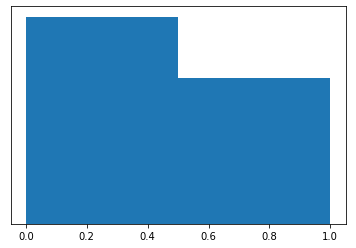

In [13]:
##### LEARNING ######

#plt.hist(dataset['age'], bins=np.size(dataset['age'].unique()))

plt.hist(dataset['churn'], bins=np.size(dataset['churn'].unique()))
# If I just do the above command, it will show me plot as well the array values on which this plot has been made, in a matrix
# form. If I simply make this command a=plt.hist(...). It will just show me the plot, and not those array values. Or else I can
# plot it in the way as i have done below, then also only the plot will be displayed

f=plt.gca()
# Doing this, I can plot the figure, and then access it using f. , say to set title, and all those things.
# Let's say I have made two plots above and then simply run a single command f=plt.gca(). It will make two plots in the same 
# figure

f.axes.get_yaxis().set_visible(False)
# This commmand gets us rid of the y-axis values, simply a blank y-axis we get to see.

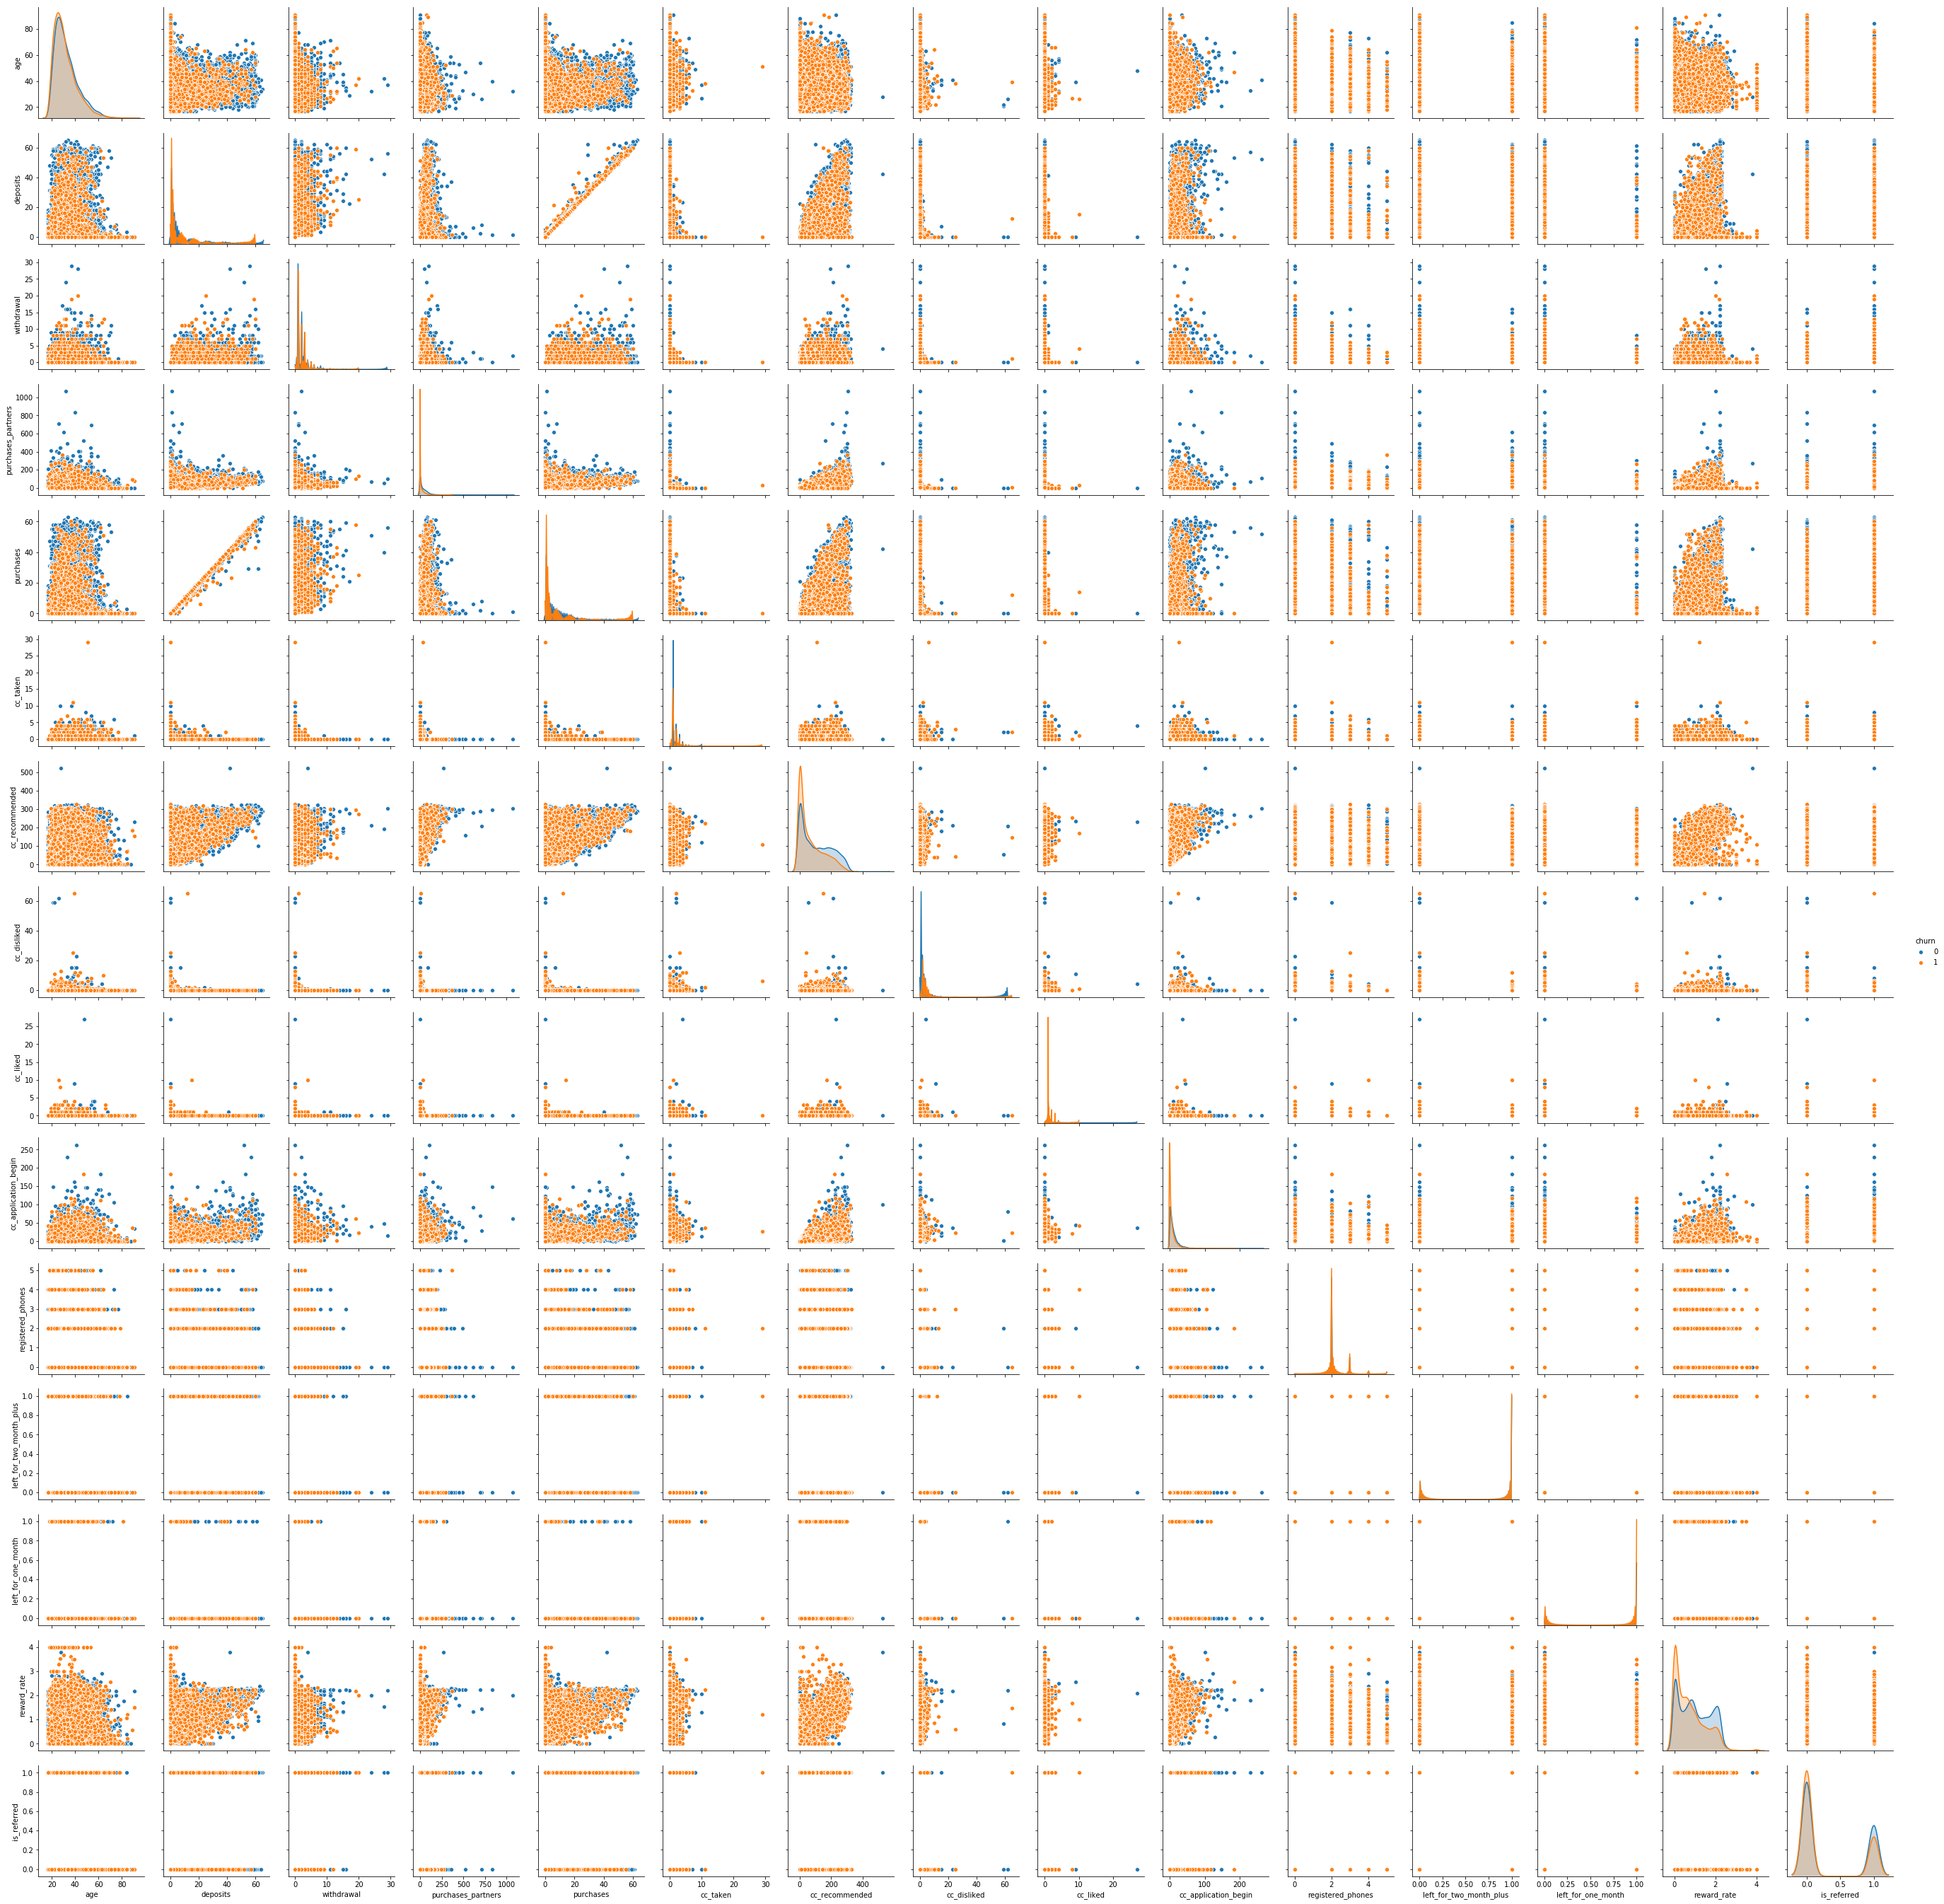

In [27]:
df=dataset[['age', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin',
       'registered_phones',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred']]

x=sns.pairplot(dataset, vars=df.columns,hue='churn')

================================================================================================================================
## Pie Plots
================================================================================================================================

Plotting Pie Plots of Binary columns. We could not dig deep into these columns using histograms. We want to explore the binary columns beacuse, we want to make sure that all the subsets of the binary varible columns include a good distribution of our response variable, so that we can include these in our model. 

We don't want a case, where for a 50 row dataset, we have 50 zeros in that binary column, and those 50 have only one value of churn variable. We want to make sure that the data is balanced. Beacuse what happens is, when we have a case like this, it doesn't matter what is the value of other columns, it will force the rsponse variable to take value 0 in the prediction. And so it won't come out to be a good model.

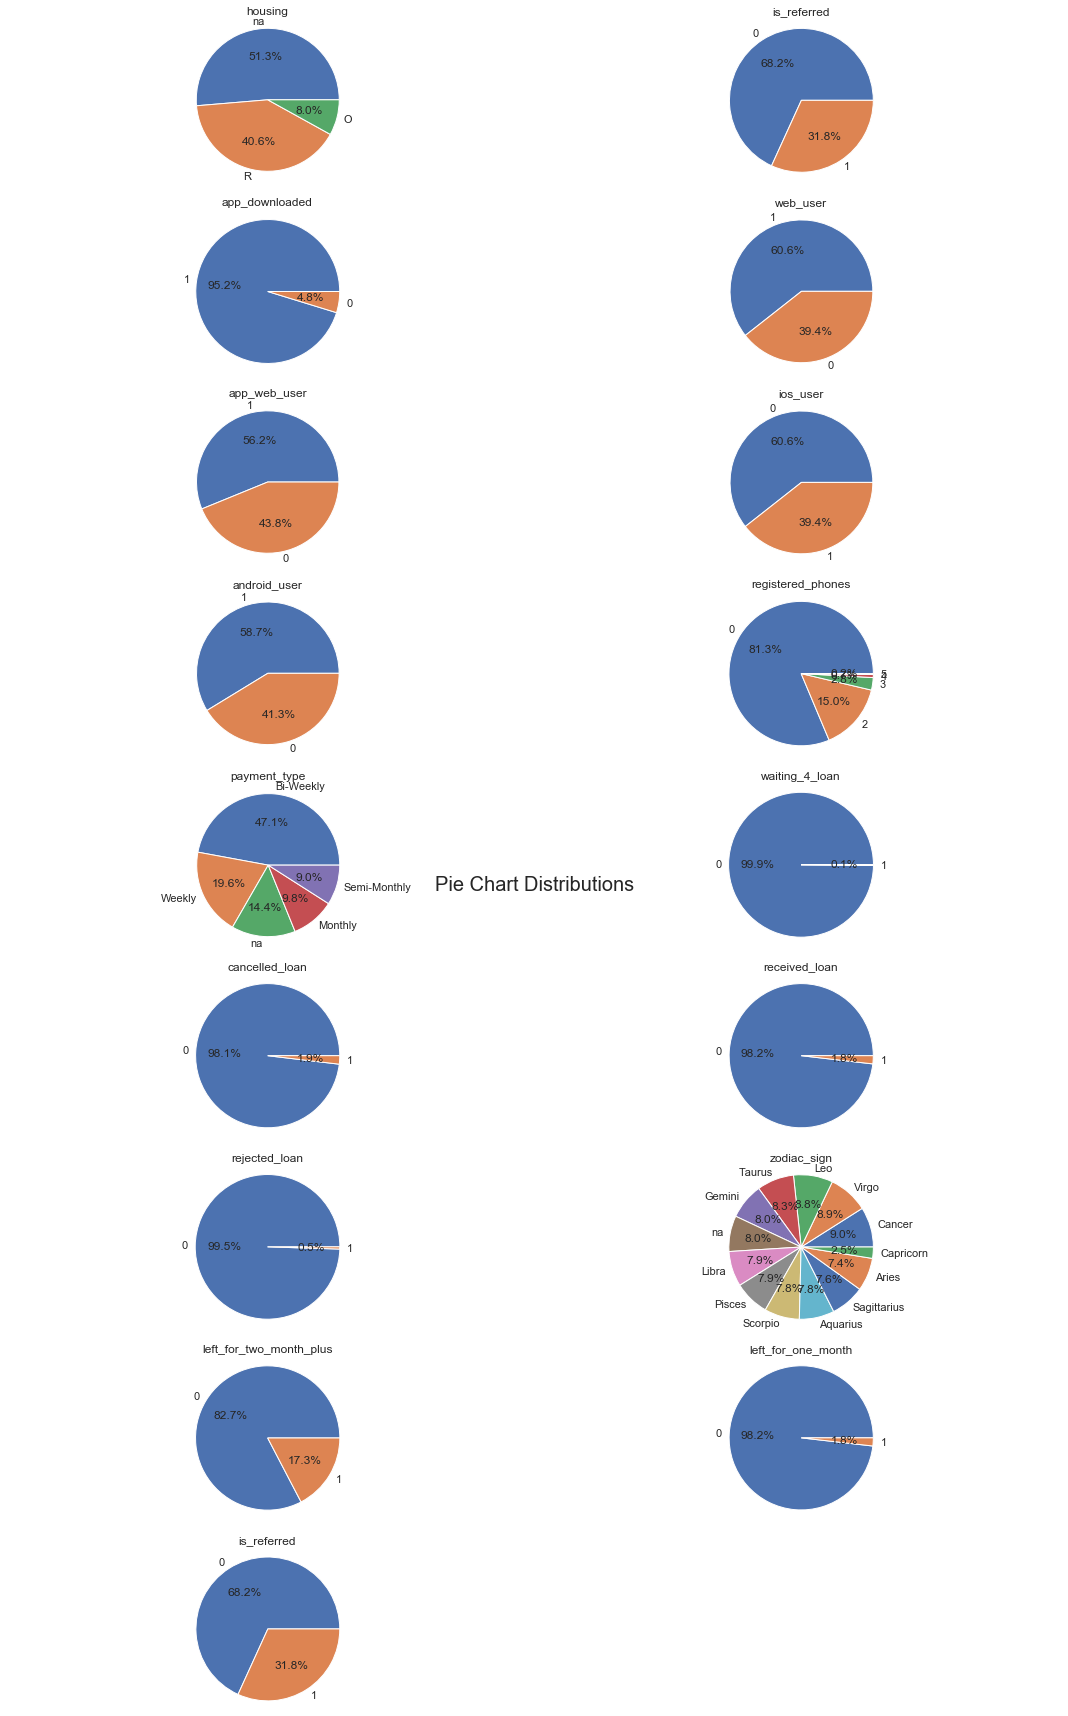

In [117]:

dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(9, 2, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values # .values, simply gets the values in array form
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index # .index gets the index of the values, that we get in the table format from .value_counts
    plt.pie(values, labels = index, autopct='%1.1f%%') #First argument is the distributions, very much like what the size of each pie is going to be, and second argument is the label
    plt.axis('equal')
fig.tight_layout(rect=[0, 0, 1, 2]) # It is in format [left, bottom, right, top]

# basically figure is there, it's upto you, how do you want to fit it.

# plt.axis('axis') ans plt.axis('scaled')
# So the difference is if the axes around the plot are changed according to the aspect, or if they stay the same as in a 
# usual subplot and are scaled such, that the aspect of the plot data is equal.

#value_counts() gives us what a table gives us in R. Tells us the count of each type of value that a column holds
# passing normalize=True as an argument in value_counts() gives the count of values as a percentage. Let's say a column has 
# has 3 types of values. Say column name is 'marital-status' and the values it holds are 'single'=10, married='50', divorced='40'
# so .value_counts will give us results, as single : 10, married: 50, divorced : 40. Whereas value_counts(normalize=True) will
# give us count as single:0.1, married: 0.5, divorced:0.4

# .value_counts(), which gives us each type of value and its count in table format, index is that value label, and values are the number of those values

# autopct tells the pie chart how to display values, %1.1f%% tells it to display float of 1 decimal.

One thing to keep in mind here is tha range(1,3) takes values from 1 to 2, 3 is not included, so many a times we have to specify the range one step ahead, if we want to include the number. i.e. to include step3, we have to specify range till step4.

Pie chart number 1, i.e. the housing pie chart tells us the undisclosed vs. disclosed house type.
51.3% are undisclosed, and 48.6%(which includes renters and owners) are disclosed. It looks nice so there's nothing to worry about. 

Most of the distributions look quite balanced(say 70 -30 or 60 to 40). The ones we worry about are the ones that have a subset that is very very small. e.g. waiting for loan, rejected loan, left_for_one_month, cancelled loan etc. And why so, why do we care about these so much, it is because, we don't want this small fraction say 0.1% in some cases to be so small that there's not enough results for it to include rows where churn variable is 0, and rows where churn variable is 1.
    
So we need to explore further to check if these columns are useful to include in our model. In order to do that, we subset these features, and see if the churn variable which is our response variable has a valid ratio/distribution of 0 and 1 for these features.






In [20]:
print(dataset[dataset2.waiting_4_loan==1].churn.value_counts())


# beacuse in dataset2 we saw that for waiting_4_loan column, percentage of 1's is just 0.1, so let's see if this fraction has 
# a reasonable distribution of churn variable.

# If we get results where value for churn is all 1's or all 0's that is a fishy situation, and we may decide to skip it. 
# But let's say we get 0:27 and 1:8, then we can say there is nothing to worry, and we can assume that there is not going to be
# any bias in this particular field. We will apply same thing to other columns also, where the subset is quite small.

print(dataset[dataset2.rejected_loan==1].churn.value_counts())
print(dataset[dataset2.received_loan==1].churn.value_counts())
print(dataset[dataset2.cancelled_loan==1].churn.value_counts())
print(dataset[dataset2.left_for_one_month==1].churn.value_counts())



0    27
1     8
Name: churn, dtype: int64
1    107
0     25
Name: churn, dtype: int64
1    292
0    199
Name: churn, dtype: int64
1    274
0    234
Name: churn, dtype: int64
1    266
0    222
Name: churn, dtype: int64


    Looks like in all the binary columns which were under suspicion that their small fraction might not hold a good distribution of response variable, and make the dataset imbalanced and our model biased, are having a good distribution of churn variable and there is nothing to worry about here.

    We are also done with the pie chart building process, which was built for the sole purpose of identifying those columns in which the distributions are uneven. How uneven are they? And seeing whether or not those small uneven subsets contain both values of the response variable. And we do have that, so we move forward to the next step of EDA.

================================================================================================================================
## Correlation Plot
================================================================================================================================

        Correlation of independent variables with the response variable. It gives us a sense which fields are going to be a stronger predictors, when they will build our model. It is not going to give us the exact correlation that our model is gonna have. But it can educate us which fields may actually impact our model. Remember correlation can only be plotted between numerical fields, to check correlation of categorical variables, we use chi-sq
        
        
dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']) 
#columns which we don't want in correlation dataframe, removing categorical variables, response variable and user variable

corrwith() # it is function using which we can find out the corrleation of all the columns of a dataframe with a particular variable. Basically we are trying to create a correlation matrix of all the independent continuous variables with the response variable.

plot.bar() # then plots the correlation obtained. We pass argument for figure size, title and its font.
rot=45 # rotates the x-lables by 45 degree so they are easier to read.
grid=True # Makes the correlation plot overall clean as the grid is now visible.

                      

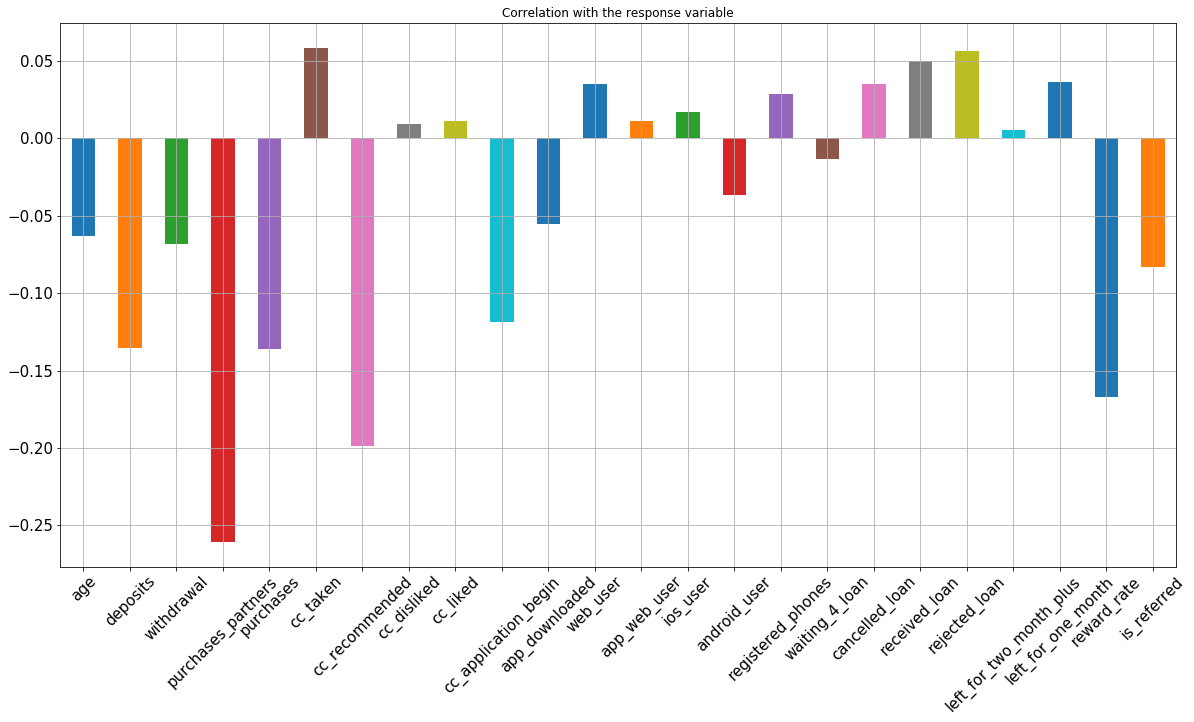

In [27]:
dataset.drop(columns=['churn','user','housing','payment_type',
                      'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize=(20,10), title='Correlation with the response variable', fontsize=15,rot=45,grid=True)



    Age: Age is negatively correlated to churn, i.e. Smaller the age is, more likely is for response variable to be 1. Younger you are, it is more likely for you to churn.

    Similar for deposits, withdrawal and purchases. More the deposits, less likely to churn. Which makes sense. This means that the less activity you have, the more likely you're going to churn.

    cc_taken is positively correlated to churn. This is telling us that if you take cc then you are more likely to churn. So may be it is giving us an insight that people are not happy with the cc feature that the company is providing. It can be interesting to explore further, what is causing users to leave the product.

    cc_recommended : The less amount of recommendations you get, more likely you are to churn. So it is better to give more recommendations, in order to stop people from churning out
    
    cc_liked and cc_disliked are postively(though weakly) correlated to response variable. Which tells us that (though conclusion may not hold true as the relation is very weak) if you like or dislike any of the products that we have, you are more likely to churn
    
    cc_application_begin: The less application you are beginning with, more likely you're to churn. The more applications you begin with, more likely you're going to stay with us. Makes sense.
    
    app_downloaded: Negatively correlated. which means, if you have downloaded the app, you're less likely to churn.
    
        web_user and ios_user are more likely to churn
        
        android_user are more likely to stay with us.
  
### Though now we can see as we move forward the strength of the bar goes down and these are not as important as other factors

    more the registered number of phones, more likely you are going to churn
    
    If waiting for loan, more likely to stay
    
    If rejected, cancelled or received loan, more likely to churn
   
### There are a lot of things to see before we conclude anything, we do not know if the corr os significant or not, also some of the correlations are very weak, it just gives us an idea in which direction does a feature leads the response. We cannot conclude anything just on basis of this.

    next if you left for one or two months, you are more likely to churn
    
    more the reward rate, less likely to churn. Makes sense
    
    if you're referred by someone, less likely to churn, makes sense
    


### We can say that more dominant factors here are financial factors like deposits, rewards etc. but there are other factors as well, which make sense that can help in model building

================================================================================================================================
## Correlation Matrix
================================================================================================================================

Shows the correlation of all the independent fields with each other

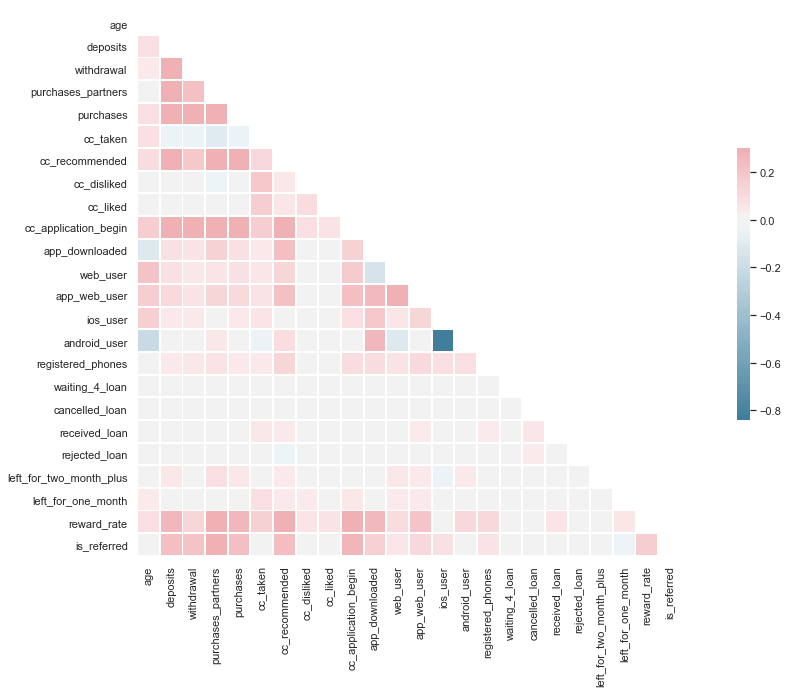

In [156]:
# Creates a white background
sns.set(style='white') 

# Builds a correlation matrix of each independent variable with each other, of course by dropping fields that we do not need
# .corr() function automatically removes the categorical variables
corr=dataset.drop(columns=['churn','user']).corr()

# Generate a mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)  #datatype specifies here that we need it in the form of True and False
mask[np.triu_indices_from(mask)]=True

#Setup matplotlib figure 
f,ax= plt.subplots(figsize=(20,10))

#Generate a custom diverging colormap
# arguments in numerical form is just for color coding, and as_cmap=True makes sure that we have an intesity variation in the 
# same color i.e. the fading effect. 
cmap = sns.diverging_palette(230,10,as_cmap=True)

#Draw a heatmap with the mask and correct aspect ratio
# provide the input correlation matrix, mask it to show it ina triangular form, provide color coding with cmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidth=1, cbar_kws={"shrink":0.5})

#center argument in heatmao specifies, where i want to place my reference point for the correlation so that the colors are 
# displayed accordingly. I always want it to be zero so that i can get a true sense of correlation just by looking at the plot

# vmax is again for the scale of the color coding that we did. You can playaround and find the difference. You will see the bar 
# that shows whether a correlation is positive or negative and tells us about what a color means in the plot, that changes with
# this option. Its vertical range is altered with it.

# Linewidth specifies how much gap i want in each the squares

# square=True makes each of the correlation plot square.

#cbar_kws refers to the color index of the plot, we are shrinking it to make the plot look nice and aesthetic to eyes

# triu is for triangular upper, basically we are making a mask then taking its upper traingular values and setting it to true,
# and then masking it over our correlation plot, which makes the upper triangular values disappear. and only the lower 
# triangular values are displayed


    If you look closely the corr matrix is a 24 by 24 matrix. i.e. each row has 24 columns, and there are 24 rows in total as there are 24 independent (continuous) variables, among which we are trying to find out the correlation.

    np.zeros_like(corr) creates a matrix which has 24 arrays, each row is filled with 24 zeros, and there are 24 rows in total. Specifying dtype=np.bool, converts these zeros into boolean which is false in this case
  
    
    Most of the fields are having zero correlation, which means they are independent of each other or atleast not linearly related
    
    Most of the positive correlations go till 0.2. There are no very strong positive correlations.
    
    In the negative correlation, we can tell relationship between android user and ios user is very strong, which makes a lot of sense. Because if you're an android user, there is very less change of you being an ios user. There are only two values this column can hold. There is not 100% correlation as there might be some users who own more than device, and there is a possibility they have both an ios and an andriod.
    
    Beacause of the correlation here, it is better for us to keep only one of them, because it is like we are looking at male users and female users, it is obvious if you do not fall in the female category, you are going to be in male category. In such cases we need only value, and that by that column being negative indicates that the other ones will be positive. Removing that doesn't hamper the knowledge of the model and keeping it is not brining anything new
    
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.


### One serious thing we are missing out here is app_web_user, it is only going to be one, when both app_downloaded and web_user are going to be 1. So it means it is not an independent variable. And we just want the independent variables, we should not be using this field. We can get rid of either web_user or app_downloaded. But the best is to get rif of app_web_user field itself. 



    

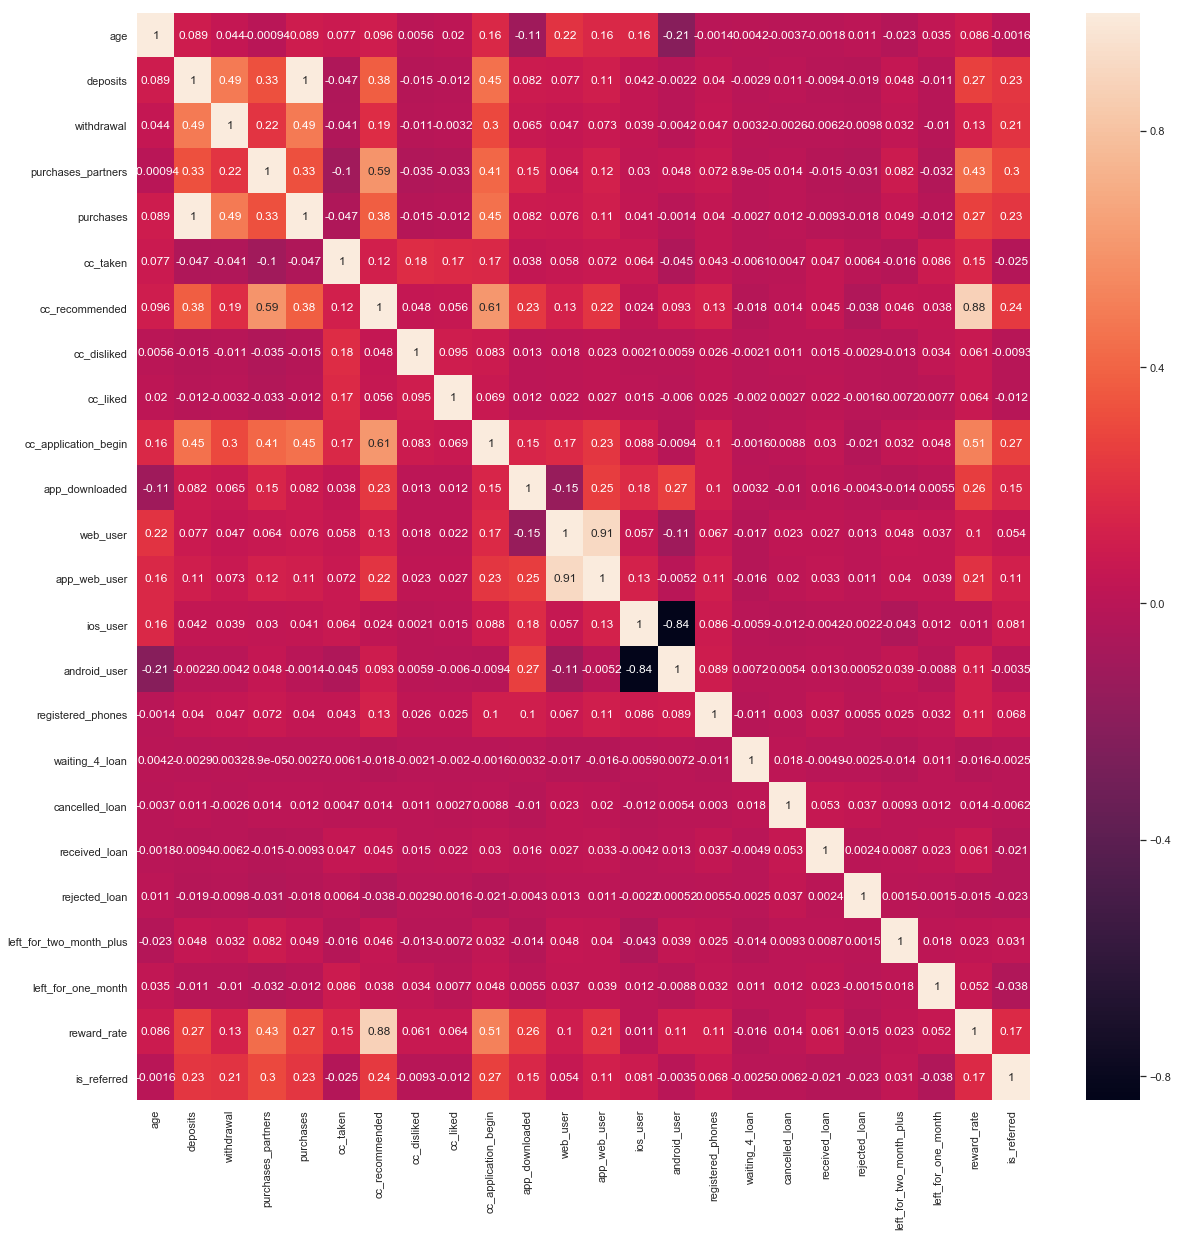

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.drop(columns=['user','churn']).corr(),annot=True)

In [102]:
dataset.drop('app_web_user',inplace=True, axis=1)

In [104]:
dataset.head()

# we have removed the app_web_user column and we have now a total of 28 columns in our dataset.
# we will save this data into a new csv file now

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [106]:
dataset.to_csv('new_churn_data.csv', index = False)

# END OF EXPLORATORY DATA ANALYSIS